# Food Waste Around The World


* Approximately one-third of the world's food production is lost or wasted, accounting for roughly 1.3 billion tonnes of food annually. 
* This inefficiency imposes a significant economic burden, costing the global economy nearly USD 940 billion each year.
* Furthermore, up to 10% of global greenhouse gas emissions stem from the production of food that ultimately goes uneaten. 
* These findings are sourced from the United Nations Environment Programme (UNEP) as of 2021.

### In this notebook, I have tried to peek into the food loss percentage around the world to find relevant insights.
`Note: The loss percentage is the percentage of food waste within the country can be calculated as:`

`(Amount of Food Wasted / Amount of Food Generated)*100`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("FoodWaste.csv")

### Exploratory data Analysis

In [3]:
df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27743 entries, 0 to 27742
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  27743 non-null  int64  
 1   country                   27743 non-null  object 
 2   region                    1317 non-null   object 
 3   cpc_code                  27743 non-null  object 
 4   commodity                 27743 non-null  object 
 5   year                      27743 non-null  int64  
 6   loss_percentage           27743 non-null  float64
 7   loss_percentage_original  27743 non-null  object 
 8   loss_quantity             585 non-null    object 
 9   activity                  22771 non-null  object 
 10  food_supply_stage         24329 non-null  object 
 11  treatment                 1410 non-null   object 
 12  cause_of_loss             1254 non-null   object 
 13  sample_size               1323 non-null   object 
 14  method

In [5]:
df = df.loc[:, "m49_code" : "cause_of_loss"]

In [6]:
df.isnull().sum()

m49_code                        0
country                         0
region                      26426
cpc_code                        0
commodity                       0
year                            0
loss_percentage                 0
loss_percentage_original        0
loss_quantity               27158
activity                     4972
food_supply_stage            3414
treatment                   26333
cause_of_loss               26489
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27743 entries, 0 to 27742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  27743 non-null  int64  
 1   country                   27743 non-null  object 
 2   region                    1317 non-null   object 
 3   cpc_code                  27743 non-null  object 
 4   commodity                 27743 non-null  object 
 5   year                      27743 non-null  int64  
 6   loss_percentage           27743 non-null  float64
 7   loss_percentage_original  27743 non-null  object 
 8   loss_quantity             585 non-null    object 
 9   activity                  22771 non-null  object 
 10  food_supply_stage         24329 non-null  object 
 11  treatment                 1410 non-null   object 
 12  cause_of_loss             1254 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.8+ MB


In [8]:
df.drop(columns = "loss_percentage_original", inplace = True)

* The Loss amount column has several miscellaneous string data which after cleaning has become so small that most of the values got NULL so I removed that column and focused mostly upon the loss percentage.

* However, you can check how I have approched towards cleaning the data using regular expression library.

In [9]:
import re

In [10]:
def clean_and_convert_to_kgs(value):
    if pd.isna(value):
        return np.nan
    
    # Remove commas and spaces
    cleaned_value = re.sub(r'[,\s]', '', str(value))
    
    # Extract numerical value and unit
    match = re.match(r'([\d.]+)\s*(\D+)', cleaned_value)
    
    if match:
        number = float(match.group(1))
        unit = match.group(2).lower()
        
        # Convert units to kgs
        if 'kg' in unit:
            return number
        elif 'g' in unit:
            return number / 1000
        elif 'tonne' in unit:
            return number * 1000
        elif 'quintal' in unit:
            return number * 100
        elif 'mg' in unit:
            return number / 1e6
        elif 'lb' in unit:
            # Assuming pounds to kilograms conversion
            return number * 0.453592
        elif 'mt' in unit:
            return number * 1000
        elif 'M kg' in unit:
            return number * 1000
        elif 'kg ha-1' in unit:
            return number / 10000  # Assuming conversion from kg/ha to kg
        else:
            return np.nan
    else:
        return np.nan

# Apply the cleaning function to the column


In [11]:
df['Cleaned_quantity_loss'] = df['loss_quantity'].apply(clean_and_convert_to_kgs)

In [12]:
dfcleaned = df.iloc[:, df.columns != ("loss_quantity")]

# Visualizations and Findings

In [13]:
dfcleaned.notnull().sum()

m49_code                 27743
country                  27743
region                    1317
cpc_code                 27743
commodity                27743
year                     27743
loss_percentage          27743
activity                 22771
food_supply_stage        24329
treatment                 1410
cause_of_loss             1254
Cleaned_quantity_loss      333
dtype: int64

In [14]:
dfcleaned.country.value_counts().sort_values(ascending = False)

United States of America    3094
India                       1354
Ethiopia                    1064
Kenya                       1054
Uganda                       866
                            ... 
Bahrain                        1
Oman                           1
Saint Kitts and Nevis          1
Germany                        1
Gabon                          1
Name: country, Length: 127, dtype: int64

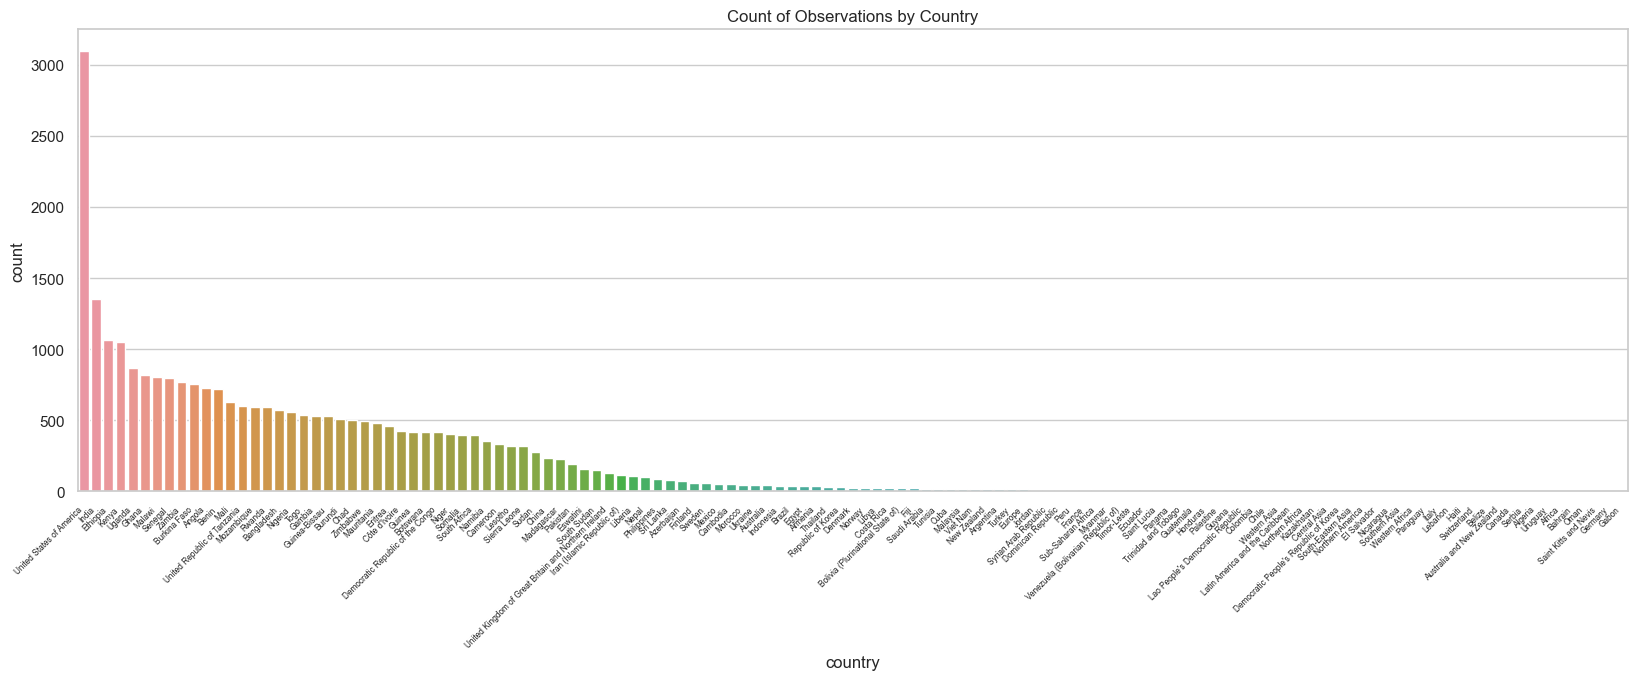

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.countplot(x="country", data=dfcleaned, order = df["country"].value_counts().index)
plt.xticks(rotation=45, ha="right", size = 6)
plt.title("Count of Observations by Country")
plt.show()

# Top 10 countries by food percent loss

In [116]:
top = dfcleaned.groupby("country")["loss_percentage"].mean().reset_index()

In [121]:
top10 = top.sort_values(by = "loss_percentage", ascending = False).head(10).reset_index()
top10

,index,country,loss_percentage
0,50,Haiti,42.500000
1,6,Australia and New Zealand,42.000000
2,121,Venezuela (Bolivarian Republic of),35.227273
3,42,Gabon,35.000000
4,83,Oman,35.000000
5,19,Canada,30.500000
6,92,Saint Kitts and Nevis,30.000000
7,0,Africa,30.000000
8,10,Belize,28.333333
9,55,Italy,25.425000


### Haiti faces major food scarcity every. According to WFP, almost 4.35 million people suffer from acute hunger, almost half the population of 11.7 million and the reason is the corrupted government and pirated ports.

#### Australia and New Zealand follows after Haiti. According to Australia Institute, Australia wastes 7.6m tonnes of food each year
#### This costs households USD 19.3 billion. Based on industry average profit margins, food retailers make USD 1.2 billion profit from this waste.

In [146]:
from PIL import Image
img = Image.open("C:/Users/pathi/OneDrive/Documents/powerbi visuals/Screenshot 2024-02-08 200257.png")

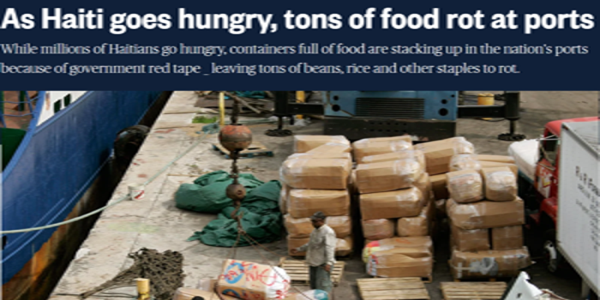

In [165]:
newsize = (600,300)
img = img.resize(newsize)
img

[]

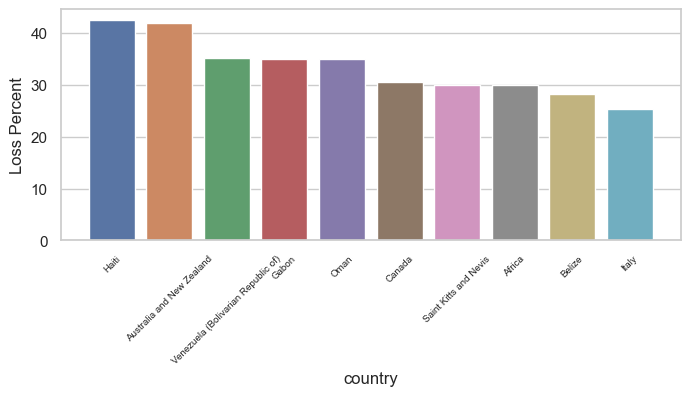

In [138]:
fig = plt.figure(figsize = (8,3))
sns.barplot(data = top10, x = "country", y = "loss_percentage")
plt.ylabel("Loss Percent")
plt.xticks(rotation = 45, size = 7)
plt.plot()

## Countries with lowest food percent loss

* According to the data, Switzerland is the most conservative country when it comes to waste food. However, according to a survey, France has recently surpassed Switzerland over lessening food wastage by implementing strict rules against the buying and seeling of food between retailers and suppliers.

In [172]:
top10_less_wasting_countries = top.sort_values(by = "loss_percentage", ascending = True).reset_index(drop = True).head(10)

[]

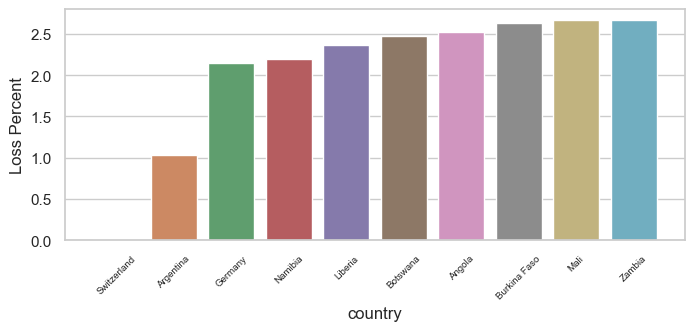

In [174]:
fig = plt.figure(figsize = (8,3))
sns.barplot(data = top10_less_wasting_countries, x = "country", y = "loss_percentage")
plt.ylabel("Loss Percent")
plt.xticks(rotation = 45, size = 7)
plt.plot()

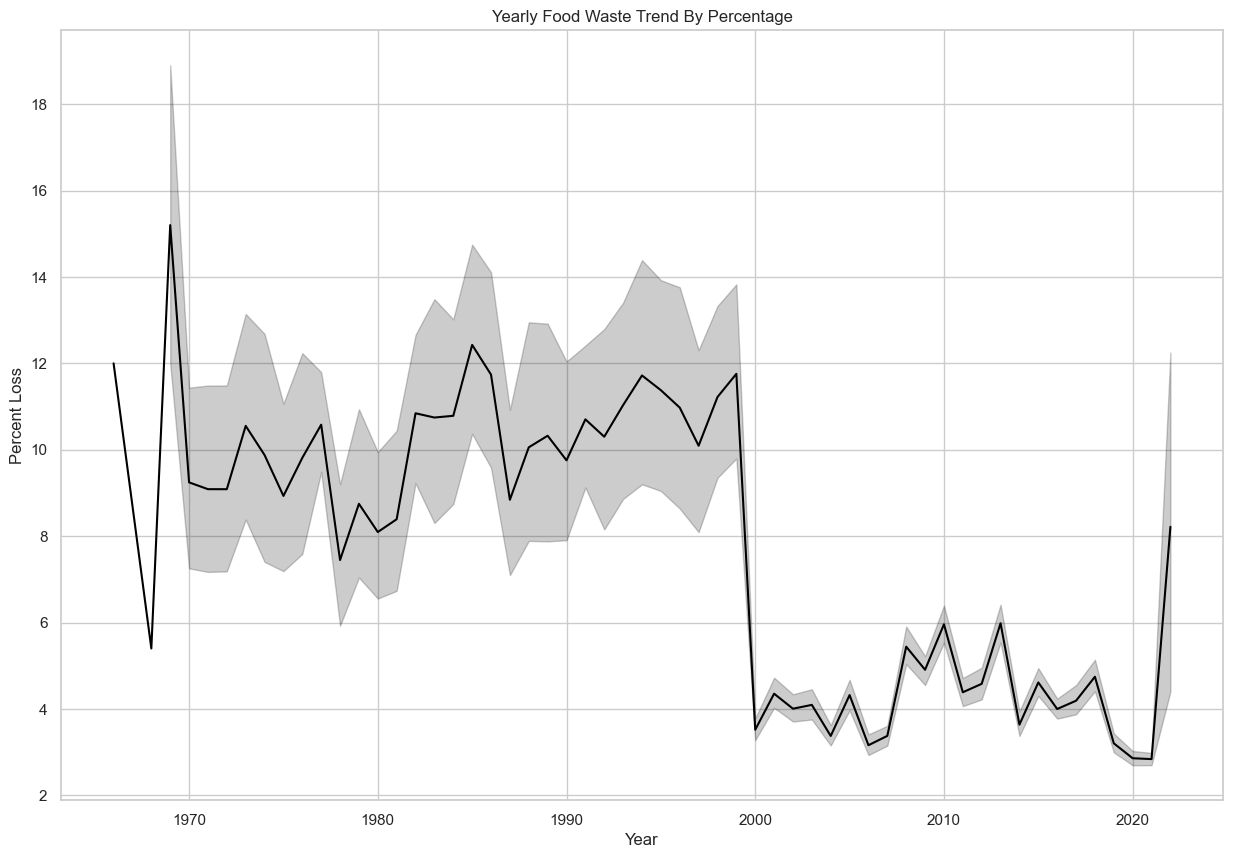

In [18]:
plt.figure(figsize = (15,10))
sns.lineplot(data = dfcleaned, x = "year", y = "loss_percentage", color = "black")
plt.xlabel("Year")
plt.ylabel("Percent Loss")
plt.title ("Yearly Food Waste Trend By Percentage")
plt.show()

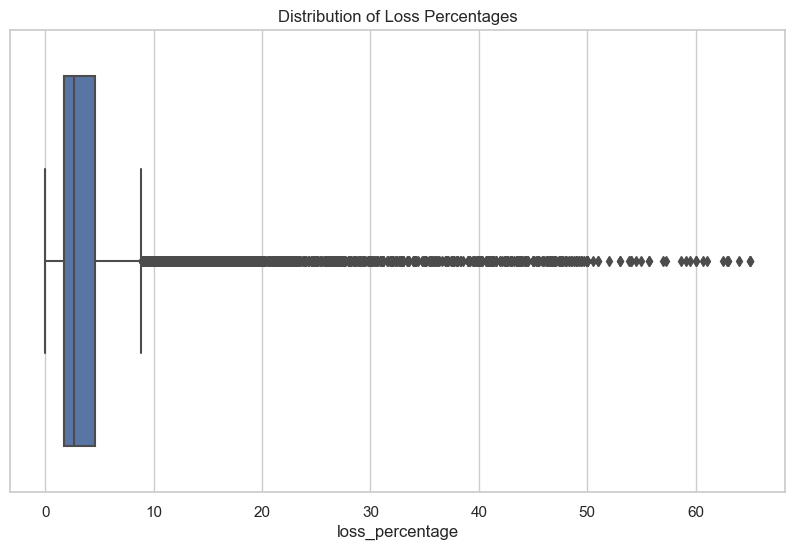

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="loss_percentage", data=dfcleaned)
plt.title("Distribution of Loss Percentages")
plt.show()

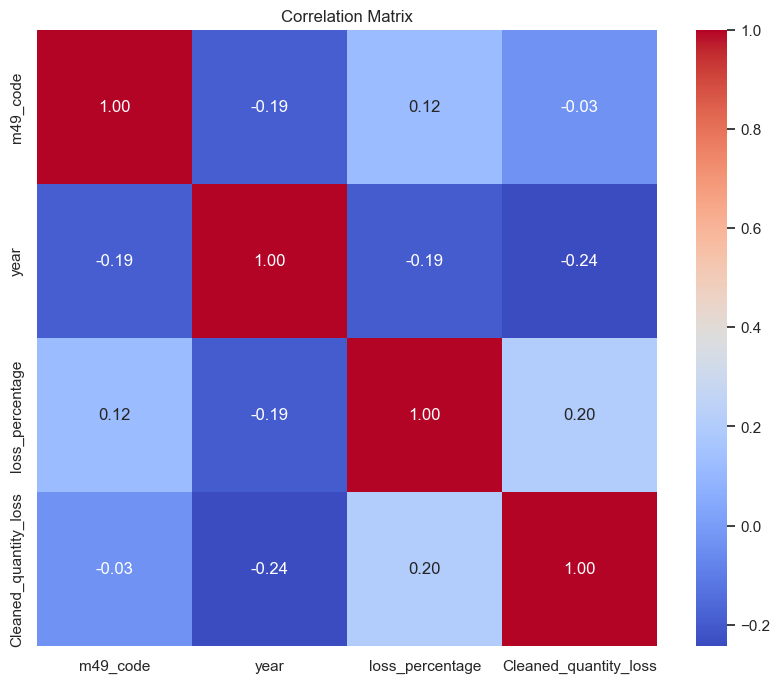

In [20]:
correlation_matrix = dfcleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Which method is used mostly to preserve Food
* The graph shows which method or process is used to up keep the food.

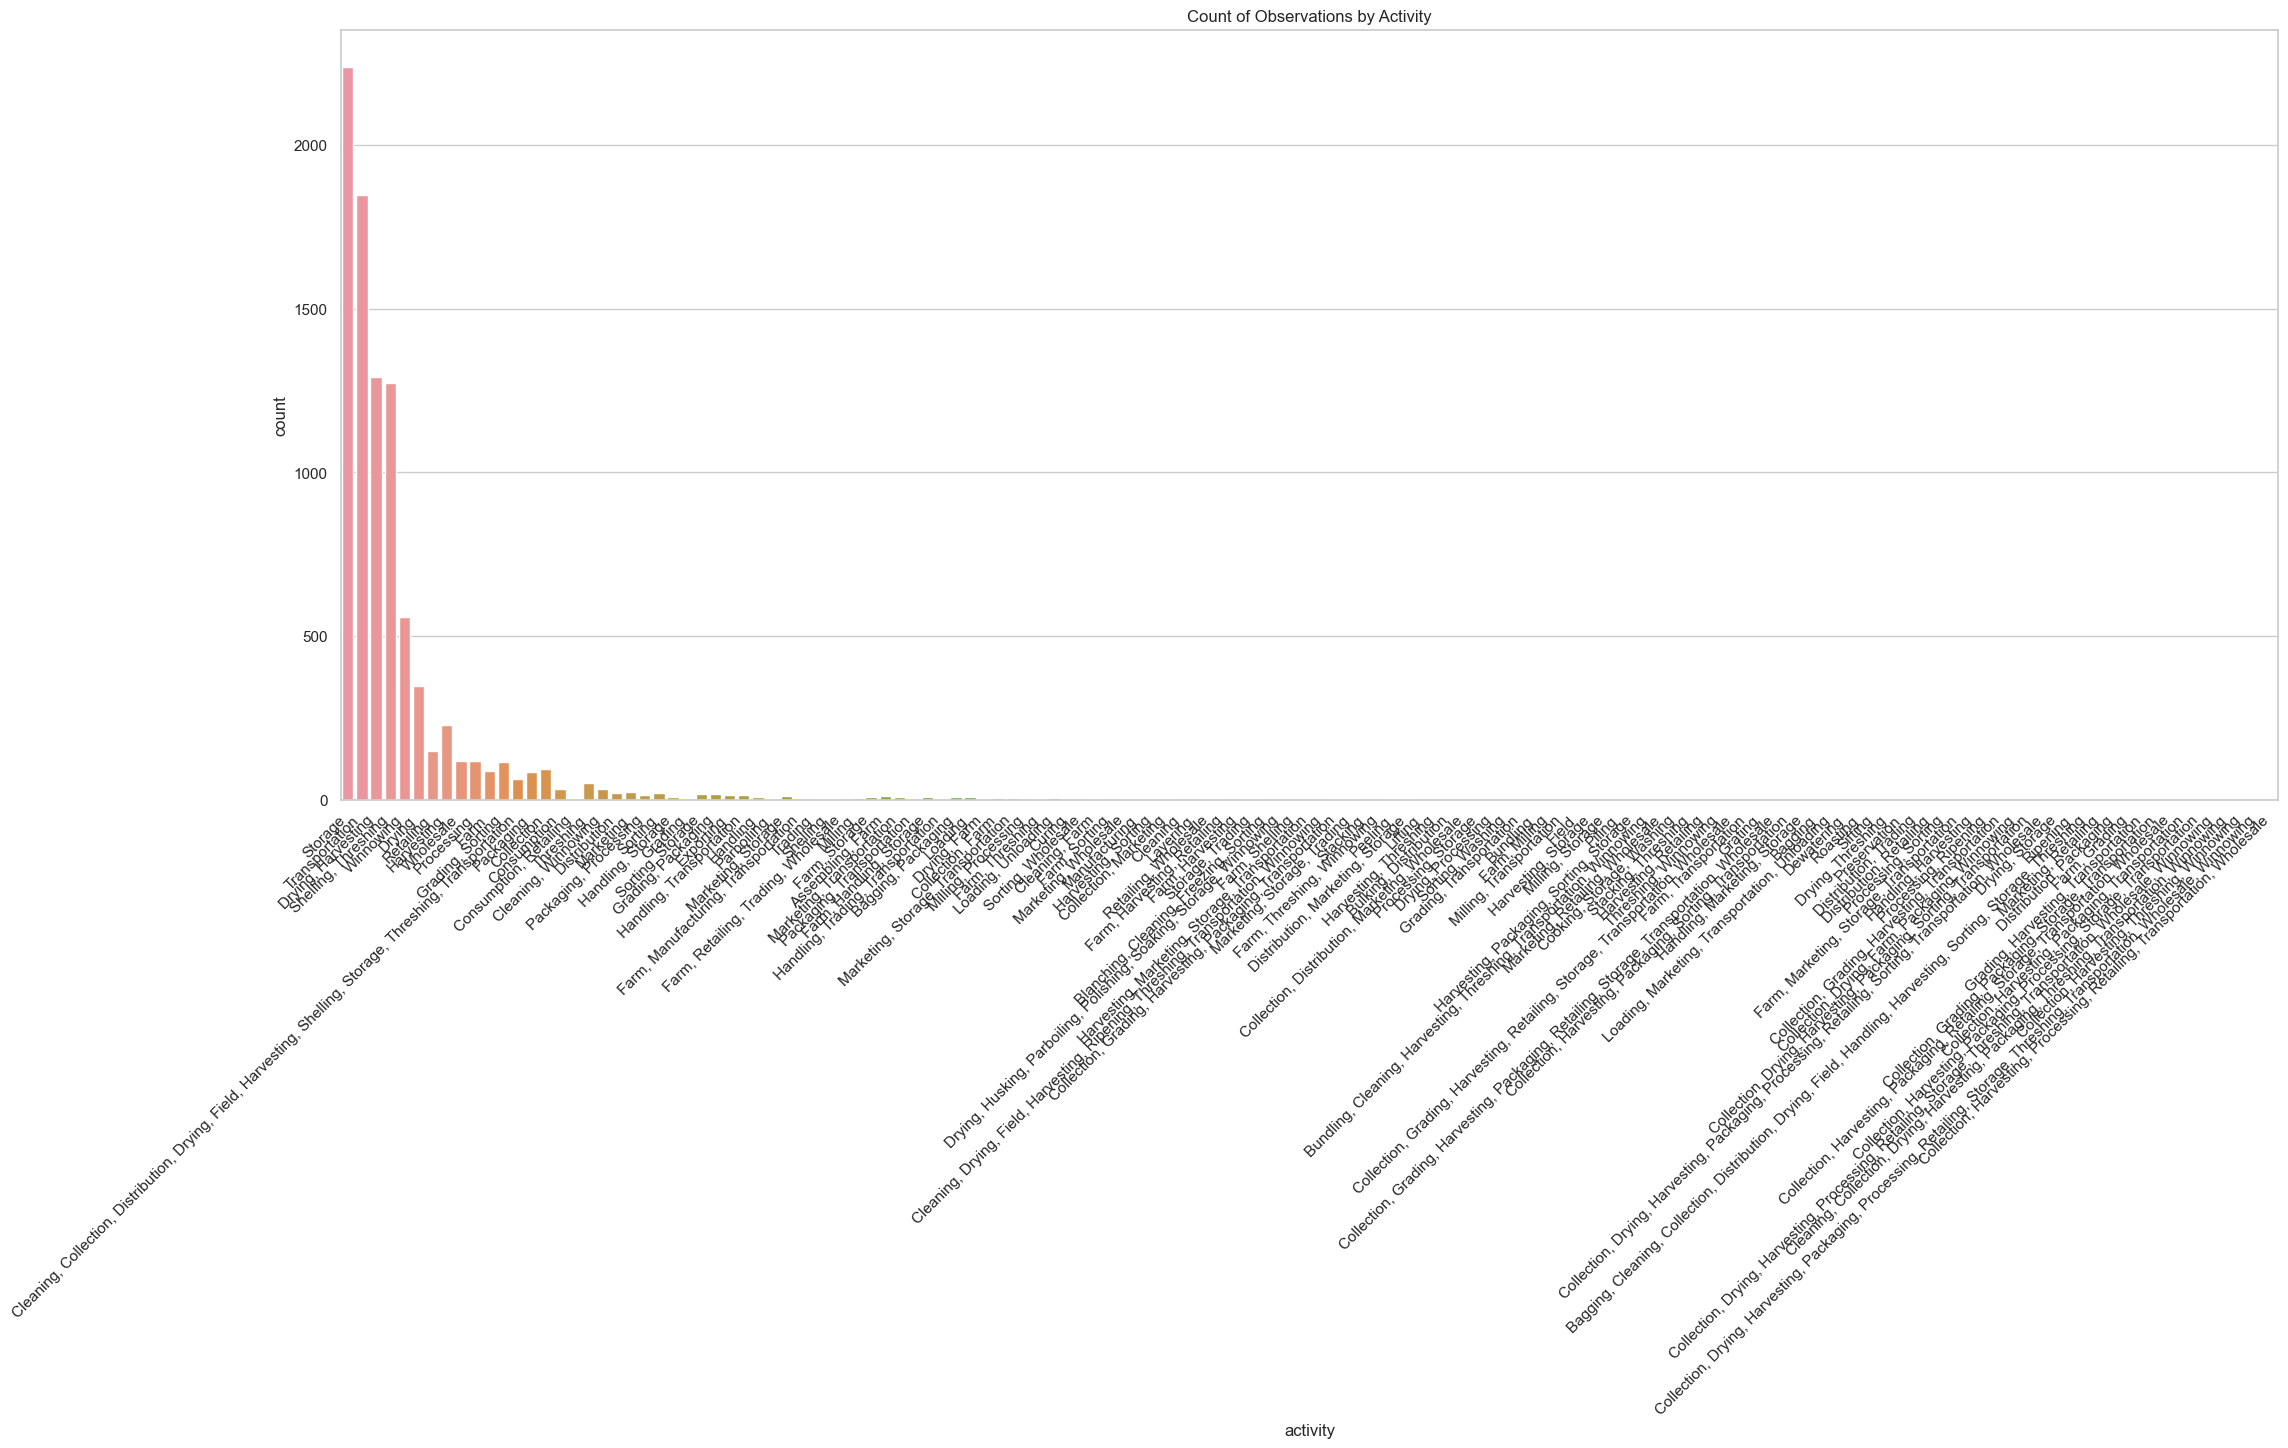

In [21]:
plt.figure(figsize=(25, 10))
sns.countplot(x="activity", data=dfcleaned.head(10000), order = df["activity"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Count of Observations by Activity")
plt.show()

In [186]:
ordereddf = dfcleaned.sort_values(by = "loss_percentage", ascending = False).reset_index()

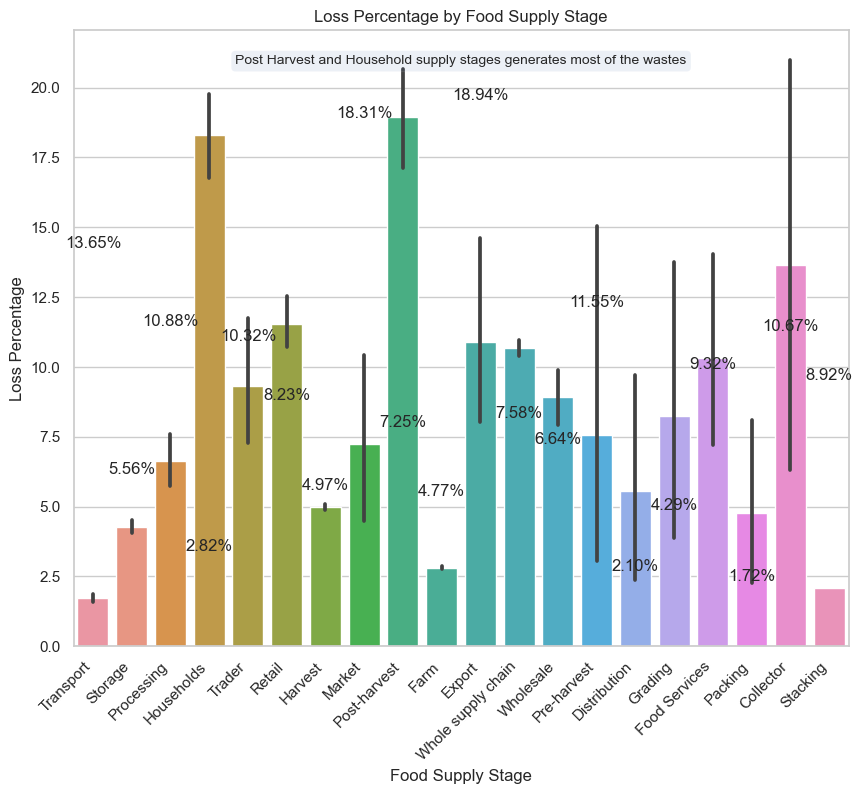

In [192]:
plt.figure(figsize = (10,8))
sns.barplot(x="food_supply_stage", y="loss_percentage", data=ordereddf)

for index, value in enumerate(ordereddf.groupby("food_supply_stage")["loss_percentage"].mean()):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.annotate('Post Harvest and Household supply stages generates most of the wastes' , xy=(0.5, 0.95), xycoords='axes fraction',
             ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

plt.title("Loss Percentage by Food Supply Stage")
plt.xlabel("Food Supply Stage")
plt.ylabel("Loss Percentage")
plt.xticks(rotation=45, ha="right")
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
backup = dfcleaned

In [27]:
backup

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,treatment,cause_of_loss,Cleaned_quantity_loss
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,Storage,Storage,"30 days storage, with trapping",Rodents,26.12
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,Storage,Storage,"60 days storage, no trapping",Rodents,88.18
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,Storage,Storage,"30 days storage, no trapping",Rodents,44.09
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,Storage,Storage,"60 days storage, with trapping",Rodents,52.24
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,Storage,Storage,"90 days storage, no trapping",Rodents,132.27
...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",112,Maize (corn),1977,13.00,NaN,Storage,NaN,Insects,NaN
27739,894,Zambia,NaN,112,Maize (corn),1977,15.00,NaN,Storage,NaN,NaN,NaN
27740,894,Zambia,NaN,114,Sorghum,1977,5.00,NaN,Whole supply chain,NaN,NaN,NaN
27741,894,Zambia,NaN,118,Millet,1977,10.00,NaN,Storage,NaN,On-Farm Storage,NaN


In [28]:
dffor = dfcleaned[["year", "loss_percentage"]]

In [29]:
dffor = dffor.sort_values(by = "year").reset_index(drop = True)

In [30]:
dff = dffor.groupby("year").sum("loss_percentage")

## Food waste time series forecasting
`The time series model has not performed well due to irregularities in data (mostly due to non availability of continous dates)`

In [31]:
data = dfcleaned[["year", "loss_percentage"]]

In [32]:
data1 = data["loss_percentage"].groupby(data["year"]).mean()

In [33]:
data = pd.DataFrame(data1)

In [34]:
# def loss_outliers(df):
#     q1 = np.percentile(df, 25)
#     q3 = np.percentile(df, 75)
#     iqr = q3 - q1
#     lower_range = q1 - 1.5*iqr
#     upper_range = q3 + 1.5*iqr
#     return df[(df.values > lower_range) & (df.values < upper_range)]

In [35]:
train = data[: int(0.8*len(data))]
test = data[int(0.8*len(data)):]

In [36]:
print(f"train shape: {train.shape} \ntest shape: {test.shape}")

train shape: (44, 1) 
test shape: (12, 1)


In [37]:
# train.drop("year", axis = 1, inplace = True)
# test.drop("year", axis = 1, inplace = True)
# print(train.dtypes)

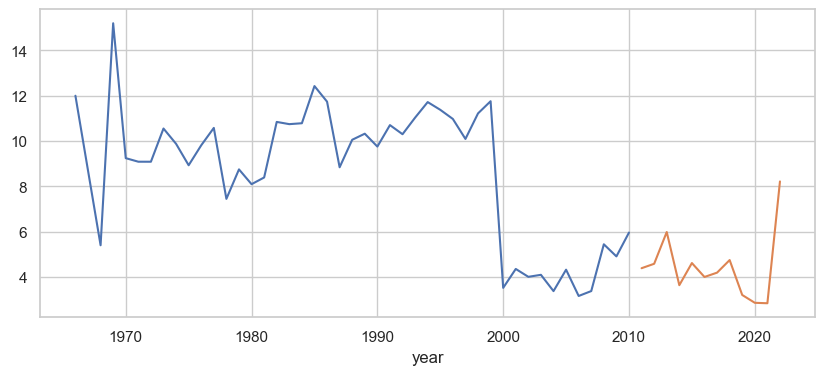

In [38]:
plt.figure(figsize = (10, 4))
train["loss_percentage"].plot()
test["loss_percentage"].plot()
plt.show()

In [39]:
from pmdarima.arima import auto_arima

In [40]:
model = auto_arima(train, trace = True, error_action = "ignore", supress_warnings = True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=199.703, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=208.460, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=195.481, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=195.667, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=206.584, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=196.040, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=196.159, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=198.018, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=193.680, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=194.412, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=194.557, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=194.347, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=196.404, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.420 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
forecast = model.predict(n_periods = len(test))
# forecast = pd.DataFrame(forecast, index = test.index, columns = ["Predictions"])

C:\Users\pathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
forecast = pd.DataFrame(forecast)

In [43]:
forecast = forecast.set_index(test.index)

In [44]:
forecast = forecast.rename(columns = {0: "Forecast"})

In [45]:
forecast

,Forecast
year,
2011,5.352221
2012,5.703871
2013,5.500603
2014,5.618100
2015,5.550182
2016,5.589441
2017,5.566748
2018,5.579866
2019,5.572283


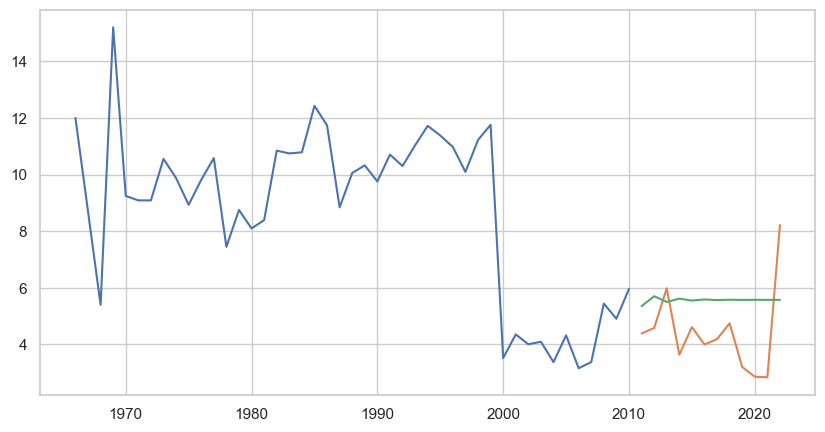

In [46]:
plt.figure(figsize= (10, 5))
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.plot(forecast, label = "Forecast")
plt.show()

In [70]:
pd.concat([forecast, test], axis = 1).describe()

,Forecast,loss_percentage
count,12.000000,12.000000
mean,5.563309,4.438821
std,0.081418,1.485642
min,5.352221,2.840168
25%,5.562607,3.529612
50%,5.574865,4.289173
75%,5.582260,4.647389
max,5.703871,8.217000


In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
mse = mean_squared_error(test, forecast)

In [69]:
mse

3.3141399826160893

In [88]:
test.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022],
           dtype='int64', name='year')

In [77]:
model2 = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
model2.fit(data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=224.513, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=210.435, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=206.609, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=215.354, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=208.262, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=208.100, Time=0.29 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=208.312, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=218.992, Time=0.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=207.965, Time=0.16 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=208.575, Time=0.28 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
T

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [92]:
forecast2 = model.predict(n_periods = 10)

C:\Users\pathi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [93]:
forecast_2 = pd.DataFrame(forecast2, columns = ["Forecasts"])

In [96]:
forecast_2 = forecast_2.set_index(np.arange(2023, 2033))

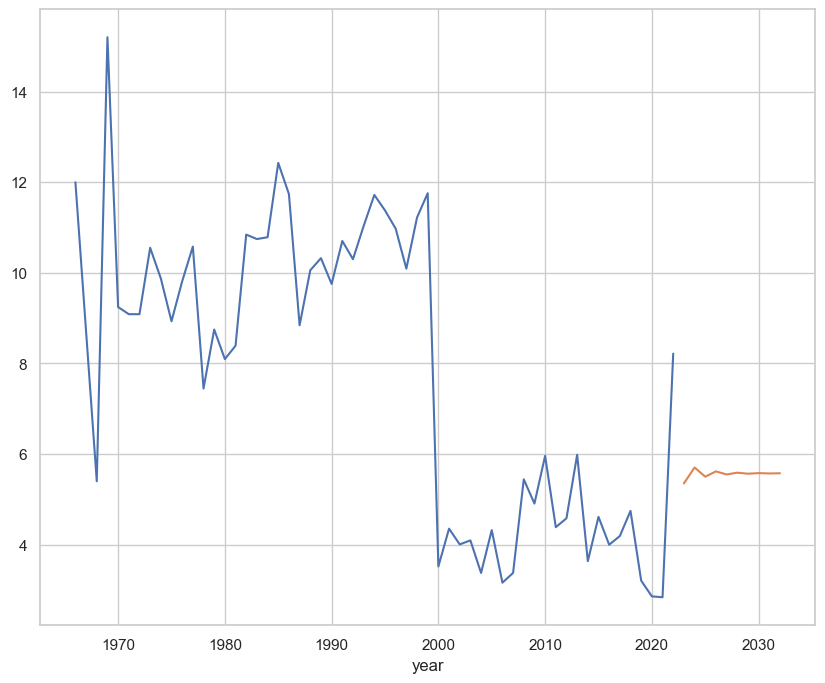

In [98]:
plt.figure(figsize = (10, 8))
data["loss_percentage"].plot()
forecast_2["Forecasts"].plot()
plt.show()